## Spotify 50 songs

Let's do some EDA and visualizations about the dataset:
- It contains the top 50 most listened songs in the world by spotify, their Genre, Beats per minute, and more.


**Importing modules and packages**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from PIL import Image
from wordcloud import WordCloud

%matplotlib inline

ModuleNotFoundError: No module named 'plotly'

**Getting to know the data**

In [2]:
dataset = pd.read_csv('top50.csv', encoding = "ISO-8859-1")
dataset.head()

Unnamed: 0                       Track.Name    Artist.Name           Genre  \
0           1                         Señorita   Shawn Mendes    canadian pop   
1           2                            China       Anuel AA  reggaeton flow   
2           3    boyfriend (with Social House)  Ariana Grande       dance pop   
3           4  Beautiful People (feat. Khalid)     Ed Sheeran             pop   
4           5      Goodbyes (Feat. Young Thug)    Post Malone         dfw rap   

   Beats.Per.Minute  Energy  Danceability  Loudness..dB..  Liveness  Valence.  \
0               117      55            76              -6         8        75   
1               105      81            79              -4         8        61   
2               190      80            40              -4        16        70   
3                93      65            64              -8         8        55   
4               150      65            58              -4        11        18   

   Length.  Acousticness..  Speechiness.  Popularity  
0      191               4             3          79  
1      302               8             9          92  
2      186              12            46          85  
3      198              12            19          86  
4      175              45             7          94

**The set contains has:**
- 3 categorical columns: 'Track Name', 'Artist Name' and 'Genre'.
- 10 numerical columns: 'BPM', 'Energy', 'Danceability', 'Loudness (dB)', 'Liveness (live record)', 'Valence (Mood)', 'Lenght', 'Acousticness', 'Popularity'.

In [3]:
dataset = dataset.drop(['Unnamed: 0'], axis = 1)

In [4]:
dataset.columns = ['Track_Name', 'Artist_Name', 'Genre', 'BPM', 'Energy', 'Danceability', 'dB', 'Liveness','Valence',
                  'Length(s)', 'Acousticness','Speechiness','Popularity']

## EDA and visualizations

**Distribution of features**

In [5]:
hist_data = [dataset['Danceability'], dataset['Popularity'], dataset['Acousticness']]
group_labels = [ 'Danceability','Popularity','Acousticness']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[10, 10,1], colors = ['#F66095', '#2BCDC1', '#393E46'])
fig.update_layout(title_text='Popularity, Danceability and Acousticness')
fig.show()

Top songs seem to be highly danceable and not acoustic!

**Top artists and top Genres**

In [6]:
Artists = pd.DataFrame(dataset['Artist_Name'].value_counts()).reset_index()
Artists.columns = ['Artist','Total songs']

In [7]:
fig = px.bar(Artists, x = 'Artist', y = 'Total songs', color = 'Artist', title='Artist vs amount of top songs')        
fig.show()

In [8]:
Genre = pd.DataFrame(dataset['Genre'].value_counts()).reset_index()
Genre.columns = ['Genre','Total songs']
fig = px.bar(Genre, x = 'Genre', y = 'Total songs', color = 'Genre', title='Genre vs amount of top songs')        
fig.show()

- There are a few top artists with 2 or more songs in the top 50.
- There are mainly three top genres: Dance Pop, Pop and Latin.

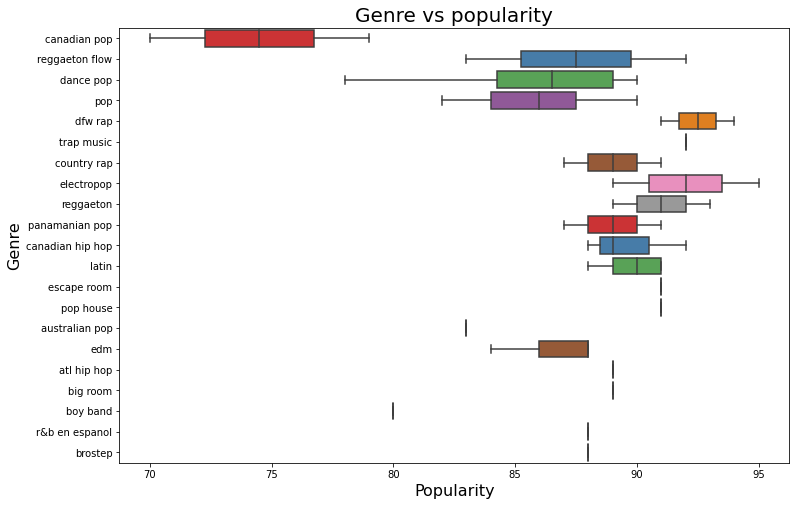

In [9]:
plt.figure(figsize=(12,8))

sns.boxplot(x = "Popularity", y = "Genre", data=dataset, palette = 'Set1')

plt.xlabel('Popularity', fontsize=16)
plt.ylabel('Genre', fontsize=16)
plt.yticks(rotation='0')
plt.title("Genre vs popularity", fontsize=20)
plt.show()

## Let's analyze the correlation between the top 50 songs

In [10]:
x = dataset.columns[3:]
heat = go.Heatmap(z =dataset.corr(),
                  x = x,
                  y = x,
                  xgap=1, ygap=1,
                  colorbar_thickness=20,
                  colorbar_ticklen=3,
                  hovertext = dataset.corr(),
                  hoverinfo='text',colorscale=[[0.0, '#F5FFFA'], 
                         [0.2, '#ADD8E6'], 
                         [0.4, '#87CEEB'],
                         [0.6, '#87CEFA'], 
                         [0.8, '#40E0D0'], 
                         [1.0, '#00CED1']]
                   )

title = 'Correlation Matrix'               

layout = go.Layout(title_text=title, title_x=0.5, 
                   width=600, height=600,
                   xaxis_showgrid=False,
                   yaxis_showgrid=False,
                   yaxis_autorange='reversed')
   
fig=go.Figure(data=[heat], layout=layout)        
fig.show() 

So we can see that there are no clear correlations with 'Popularity'. There is no recipe for a song to be among the top 50!

Correlations seen:
- Speechiness and BPM
- Energy and dB

In [11]:
fig = px.scatter(dataset, x = "Speechiness", y = "BPM", size='Popularity', color = "Genre", title = 'BPM vs. Speechiness')
fig.show()

In [12]:
fig = px.scatter(dataset, x = "Energy", y = "dB", size='Popularity', color = "Genre", title = 'Energy vs. dB')
fig.show()

## Energy vs. Danceability

<Figure size 864x576 with 0 Axes>

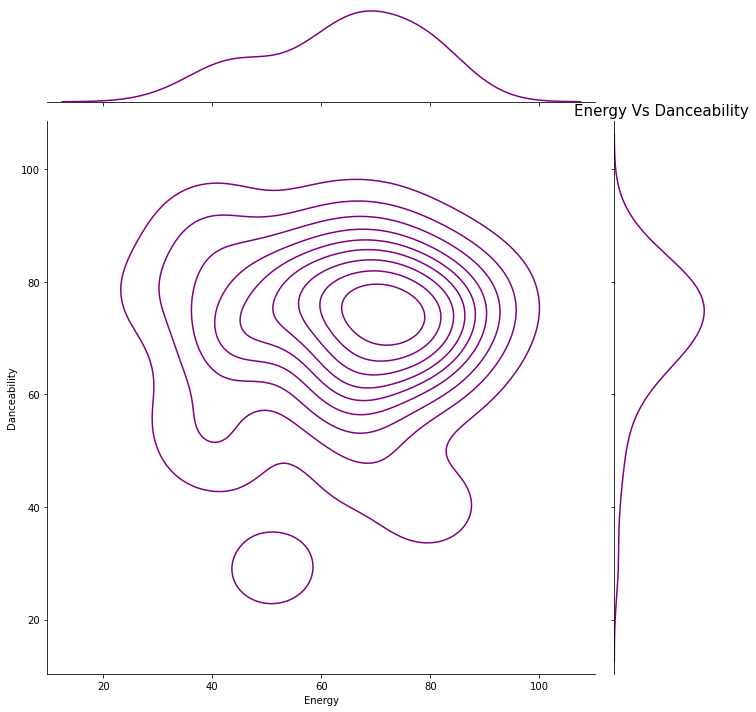

In [13]:
plt.figure(figsize=(12,8))
sns.jointplot(x = dataset["Energy"], y = dataset['Danceability'], height=10 ,kind="kde", color='purple')

plt.ylabel('Danceability', fontsize=12)
plt.xlabel("Energy", fontsize=12)
plt.title("Energy Vs Danceability", fontsize=15)

plt.show()

In [14]:
hist_data = [dataset['Energy'], dataset['Danceability']]
group_labels = [ 'Energy','Danceability']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[10, 10], colors = ['#D4323E', '#3466D4'])
fig.update_layout(title_text='Energy vs Danceability')
fig.show()

## Speechines vs. dB

<Figure size 864x576 with 0 Axes>

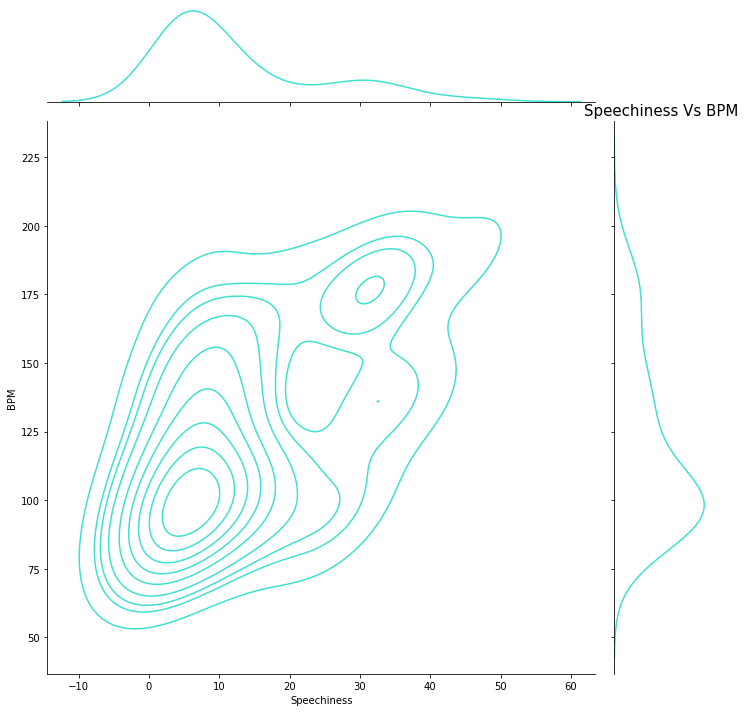

In [15]:
plt.figure(figsize=(12,8))
sns.jointplot(x = dataset["Speechiness"], y = dataset['BPM'], height=10 ,kind="kde", color='turquoise')

plt.ylabel('BPM', fontsize=12)
plt.xlabel("Speechiness", fontsize=12)
plt.title("Speechiness Vs BPM", fontsize=15)

plt.show()

In [16]:
hist_data = [dataset['Speechiness'], dataset['BPM']]
group_labels = [ 'Speechiness','BPM']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[12, 12], colors = ['#2462ab', '#2ba323'])
fig.update_layout(title_text='Speechiness vs BPM')
fig.show()

Now let's see what word is the most repeated in title column!

In [17]:
new_csv = dataset[['Artist_Name']]
new_csv.to_csv('new_csv.txt', header=True, index=False, sep='\t', mode='a')

In [18]:
new_csv.head()

Artist_Name
0   Shawn Mendes
1       Anuel AA
2  Ariana Grande
3     Ed Sheeran
4    Post Malone

Using https://fontawesome.com/icons?d=gallery&m=free images

In [19]:
import stylecloud

stylecloud.gen_stylecloud(file_path='new_csv.txt',
                          icon_name='fas fa-microphone',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal')

C:\Users\Agust\Anaconda3-2\lib\site-packages\stylecloud\stylecloud.py:135: MatplotlibDeprecationWarning:


The makeMappingArray function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. This is not considered public API any longer.



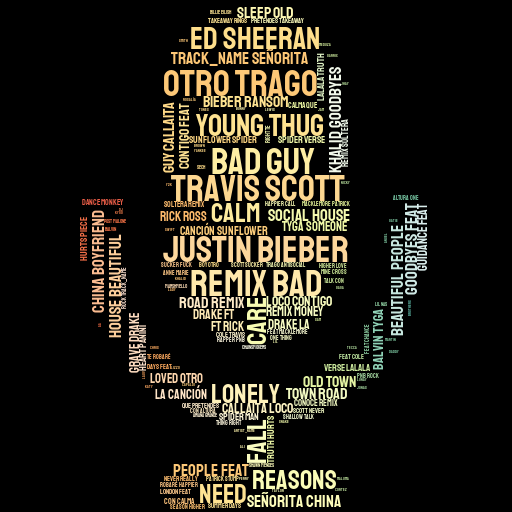

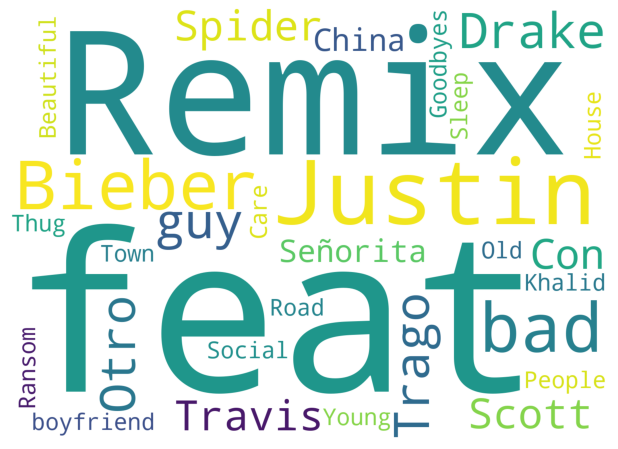

In [20]:
plt.subplots(figsize=(12,8))
wordcloud = WordCloud(
                          background_color='White',max_words = 30,
                           contour_color='black', contour_width=1, 
                          width=1500, margin=10,
                          height=1080
                         ).generate(" ".join(dataset.Track_Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()